Интернет-магазин продает компьютерные игры по всему миру и собирается выявить определяющие успешность игр закономерности для планирования рекламных кампаний. Доступны данные продаж игр, их рейтинги, жанры, платформы и возрастной рейтинг ESRB. Данные периода до 2016 года будут использоваться для прогнозирования продаж на 2017 и более поздние годы.

**Изучение данных и обработка их**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
try:
    data = pd.read_csv('/Users/arina200212yandex.ru/Desktop/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9539,Megamind: The Blue Defender,PSP,2010.0,Adventure,0.08,0.03,0.00,0.02,NaN,tbd,E10+
7475,The Naked Brothers Band: The Video Game,Wii,2008.0,Misc,0.19,0.00,0.00,0.01,NaN,NaN,NaN
5410,Spy Hunter,XB,2002.0,Racing,0.25,0.07,0.00,0.01,71.0,tbd,T
16320,BlazBlue: Calamity Trigger,PC,2010.0,Fighting,0.00,0.01,0.00,0.00,NaN,8.7,T
9913,SD Gundam G Generation-F.I.F,PS,2001.0,Strategy,0.00,0.00,0.11,0.01,NaN,NaN,NaN
9059,MTV Music Generator 3: This Is the Remix,PS2,2004.0,Misc,0.07,0.05,0.00,0.02,79.0,8.6,T
7845,Kenka Banchou 4: Ichinen Sensou,PSP,2010.0,Action,0.00,0.00,0.19,0.00,NaN,NaN,NaN
9710,The King of Fighters '94,NG,1994.0,Fighting,0.00,0.00,0.12,0.00,NaN,NaN,NaN
6442,Shin Megami Tensei: Devil Survivor,DS,2009.0,Role-Playing,0.13,0.00,0.12,0.01,84.0,8.8,T
6527,ExciteBots: Trick Racing,Wii,2009.0,Racing,0.24,0.00,0.00,0.02,77.0,8.6,E


In [ ]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
data.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


Вывод о наборе данных:

Необходимо изменить тип данных столбца Year_of_Release на int(). Также обнаружено наличие пропущенных значений в столбцах Name, Year_of_Release, Critic_Score, User_Score и Rating. Требуется исправить регистр наименований столбцов.

In [ ]:
data.columns = data.columns.str.lower()

Столбцы Name и Year_of_Release содержат небольшое количество пропущенных значений, поэтому удаление этих строк не оказывает серьезного влияния на выборку и не нанесет ущерба для анализа. Требуется произвести удаление строк с пропущенными значениями.

In [ ]:
data = data.dropna(subset=['year_of_release', 'name', 'genre']).reset_index()

Изменим тип данных.

In [ ]:
data['year_of_release'] = data['year_of_release'].astype(int)

Обратим внимание на столбец user_score

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Неверный тип данных обнаружен в столбце - требуется заменить на float, так как содержит числовые значения. Также значение "tbd" вызывает вопросы, поэтому необходимо заменить его на nan. Поскольку при более детальном рассмотрении видно, что это означает отсутствие данных (To Be Determined), а значит, можно считать эти случаи пропущенными.

In [ ]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')

In [ ]:
data[data['critic_score'].isnull()].head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [ ]:
data[data['user_score'].isnull()].head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [ ]:
data[data['rating'].isnull()].head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Столбцы Critic_Score, User_Score и Rating имеют очень большое количество пропущенных значений и зависят друг от друга. Скорее всего, эти пропуски возникли не случайно. Из-за этой зависимости и большого количества пропущенных значений (почти половина выборки) не рекомендуется заменять их. Рекомендуется оставить значения, как есть. Однако столбец "Rating" следует заменить пропущенные значения на "norating".

In [ ]:
data['rating'] = data['rating'].replace(np.NaN,'norating')

При появлении пропущенных значений в столбце "Critic_Score" это могло быть вызвано тем, что на момент выпуска игр еще не было такого правила, как оценка критиков, или может не было доступных критиков для оценки. В столбце "User_Score" пропуски скорее всего возникли из-за отсутствия специализированных платформ для оценки пользователей на тот момент. В столбце "Rating" пропуски могли появиться из-за того, что во время выпуска этих игр еще не существовалы соответствующие организации, которые занимаются рейтингованием игр.
Столбцы "Name", "Platform", "Genre" и "Rating" содержат строки разного регистра. Для нормализации данных необходимо привести все строки к нижнему регистру.

Заметим, что в стобцах name,platform,genre и rating строки имеют разный регистр. Приведем все строки к нижнему регистру

In [ ]:
list_low = ['name','platform','genre','rating']
for i in list_low:
    data[i] = data[i].str.lower()

Посмотрим на дубликаты:

In [ ]:
data.duplicated().sum()

0

Явных дубликатов нет.

Создадим столбец - Суммарные продажи во всех регионах.

In [ ]:
data['total_prodag'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Подготовка данных завершена после обработки пропусков, исправления типа данных столбца Year_of_Release, а также преобразования всех строк столбцов Name, Platform, Genre и Rating в нижний регистр. Дубликаты не обнаружены. 

**Иследовательский анализ данных**

Рассмотрим сколько игр выпускалось в разные годы. 

In [ ]:
years_igra = data.groupby('year_of_release').agg({'name':'count'})
years_igra

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


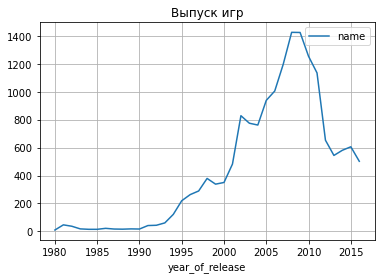

,name
count,37.000000
mean,444.432432
std,451.604334
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


In [ ]:
years_igra.plot(grid = True)
plt.title('Выпуск игр')
plt.show()
years_igra.describe()

Наибольшее количество игр было выпущено между 2005 и 2010 годами. Однако значительный рост начался с 1995 года. Для анализа можно выделить период с 1995 по 2010 год, так как в этот период было выпущено максимально возможное количество игр.

Посмотрим, как менялись продажи по платформам.

In [ ]:
ten_platform = data.groupby('platform').agg({'total_prodag':'sum'}).sort_values(by = 'total_prodag', ascending = False)
ten_platform = ten_platform.head(10)
ten_platform

,total_prodag
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


In [ ]:
top_list = ['ps2','x360',
'ps3',
'wii',
'ds',
'ps',
'ps4',
'gba',
'psp',
'3ds']

,total_prodag
count,10.000000
mean,672.204000
std,351.088191
min,257.810000
25%,313.195000
50%,765.180000
75%,921.300000
max,1233.560000


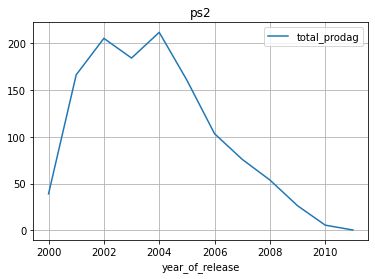

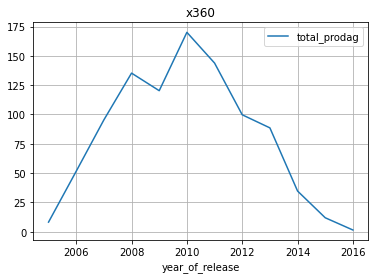

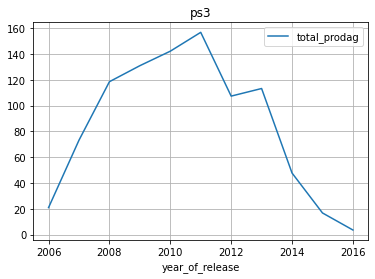

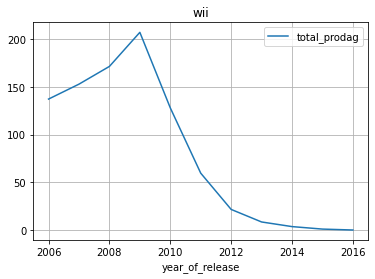

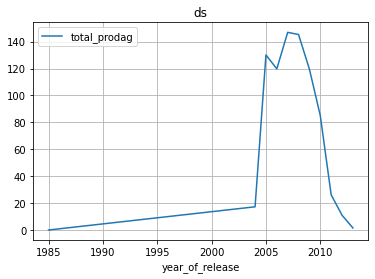

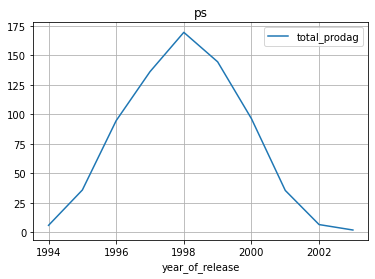

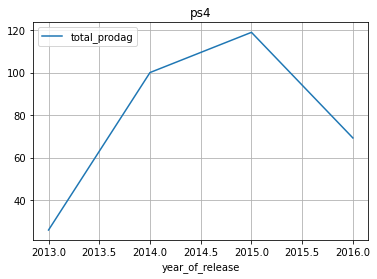

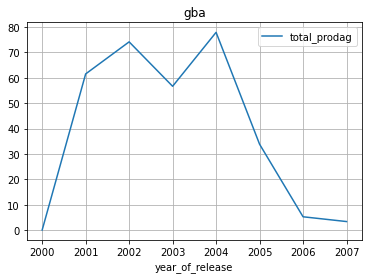

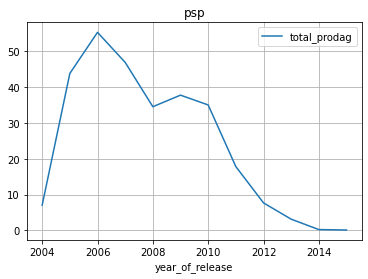

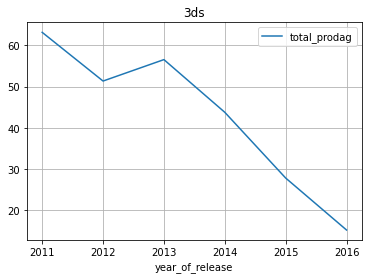

In [ ]:
for i in top_list:
    data[data['platform'] == i].pivot_table(index='year_of_release', values='total_prodag', aggfunc='sum').plot(grid = True)
    plt.title(i)

ten_platform.describe()

Характерный срок 'жизни' платформ 9-10 лет.

Для изучения динамики развития рынка выбран период с 2014 по 2016 год, так как, анализируя графики жизненного цикла платформ, можно сделать вывод о том, что платформы появляются, достигают пика популярности через несколько лет и затем начинают угасать. Однако, учитывая, что выборка менее информативная для дальнейшего анализа, выбирается именно такой период

In [ ]:
period_1 = data.query('year_of_release >= 2014')
period_1

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_prodag
31,31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,norating,14.63
42,42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,norating,11.68
77,77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,norating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,norating,0.01
16436,16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,norating,0.01
16439,16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,norating,0.01
16441,16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,norating,0.01


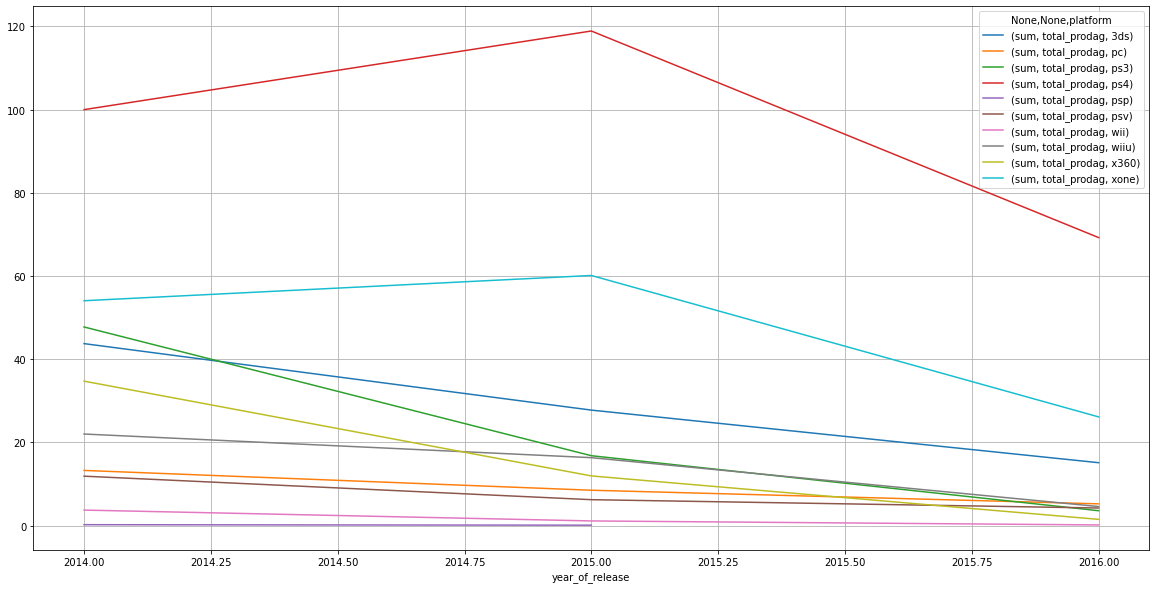

In [ ]:
actual_platform = period_1.pivot_table(index = ['year_of_release'], columns = ['platform'], values = ['total_prodag'],aggfunc =  ['sum'])
actual_platform.plot(figsize = (20,10),grid = True)
plt.show()

**Вывод**
Все представленные на графике платформы в 2016 году имеют снижение продаж, однако некоторые из них не падают так сильно, как другие. Это касается платформ PS4, Xone и 3ds.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

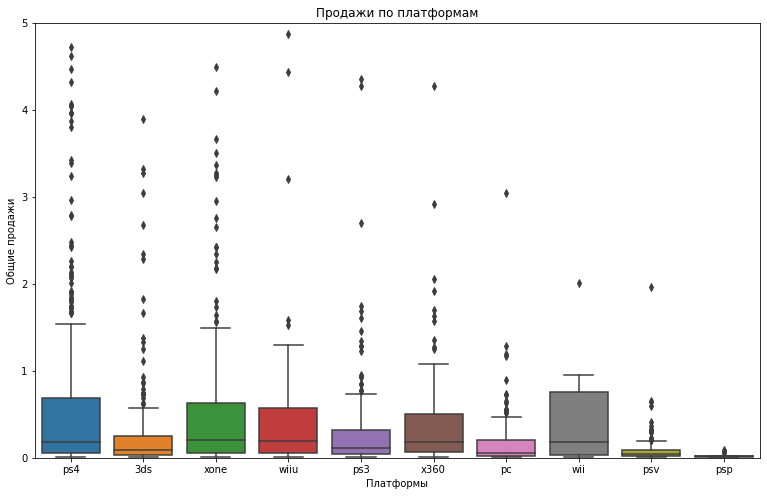

In [ ]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = period_1 , y = 'total_prodag', x='platform')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 5)))

plt.show()

Медианные продажи наибольшие у платформ Xbox 360, PS3, PS4 и Xbox One. Среди всех платформ наименьшие продажи у платформы DC. Также на графике присутствуют достаточно много выбросов для каждой платформы.

На графике распределения продаж видно, что у всех платформ примерно одинаковая плотность диапазона продаж с медианой, которая ближе к нижней квартиле. Из этого можно сделать вывод, что большинство игр имеют довольно низкие объемы продаж, но также присутствуют и игры с высокими показателями продаж.

**Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков**

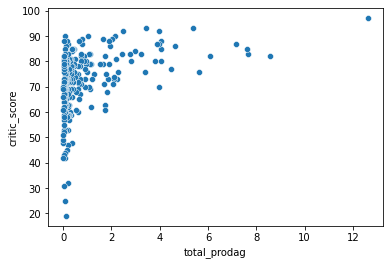

In [ ]:
sns.scatterplot(y= 'critic_score', x = 'total_prodag',data =period_1.query('platform == "ps4"').dropna())
plt.show()

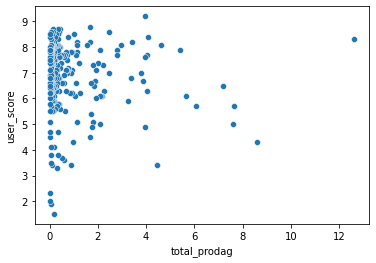

In [ ]:
sns.scatterplot(y= 'user_score', x = 'total_prodag',data =period_1.query('platform == "ps4"').dropna())
plt.show()

Чем выше рейтинг игры у критиков, тем скорее всего больше денег она приносит. Однако, когда речь идет об оценках пользователей, ситуация не всегда так однозначна. Некоторые игры, имеющие низкий рейтинг от пользователей, могут все равно собирать достаточно большую сумму продаж.

In [ ]:
top_list = ['ps2','x360',
'ps3',
'wii',
'ds',
'ps',
'ps4',
'gba',
'psp',
'3ds']

In [ ]:
for i in top_list:
    platform = period_1[period_1['platform']== i]
    correl = platform['user_score'].corr(platform['total_prodag'])
    critic_correl = platform['critic_score'].corr(platform['total_prodag'])
    print(i,correl,critic_correl)

ps2 nan nan
x360 -0.138444570945665 0.5257228356581523
ps3 -0.16676141347662118 0.44657460493190704
wii 1.0 nan
ds nan nan
ps nan nan
ps4 -0.040131589472697356 0.40266141068104083
gba nan nan
psp nan nan
3ds 0.2151932718527028 0.314117492869051


**Вывод**
Проанализировав данные для топ 10 платформ и обнаружили следующее:

1. PS2: у платформы слабая корреляция как с отзывами критиков, так и пользователей.

2. Xbox 360: у платформы также слабая корреляция как с отзывами критиков, так и пользователей.

3. PS3: корреляция между платформой и отзывами критиков и пользователей также является слабой.

4. Wii: корреляция между платформой и отзывами критиков и пользователей также является слабой.

5. DS: корреляция между платформой и отзывами критиков и пользователей также является слабой.

6. PS: у нас отсутствуют данные для этой платформы в период с 2006 по 2016 год.

7. PS4: корреляция между платформой и отзывами критиков не обнаружена, а корреляция с отзывами пользователей умеренная.

8. GBA: у нас не выявлено корреляции между платформой и отзывами критиков и пользователей.

9. PSP: корреляция между платформой и отзывами критиков является слабой, а корреляция с отзывами пользователей умеренная.

10. 3DS: у этой платформы корреляция между отзывами критиков и пользователей также является слабой, а корреляция между отзывами пользователей и платформой умеренная

**Посмотрим на общее распределение игр по жанрам.**

In [ ]:
raspredelenie_genre = period_1.groupby('genre').agg({'total_prodag': 'mean'})

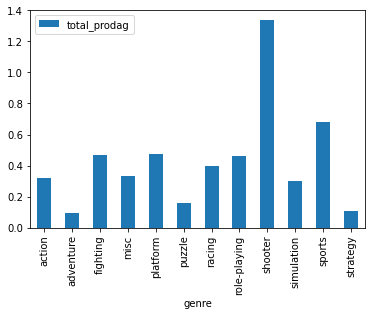

In [ ]:
raspredelenie_genre.plot(kind='bar')
plt.show()

Самым популярным жанром по продажам игр стал shooter, на втором месте — platrform. Выделяется сильное присутствие продаж именно в этих жанрах.

**Составим портрет пользователя каждого региона**

Необходимо определить для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ - 5)

In [ ]:
five_platforms_na = period_1.groupby('platform').agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending = False)
five_platforms_na = five_platforms_na.head(10)
five_platforms_na

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05
wiiu,19.36
pc,7.23
psv,2.52
wii,2.08


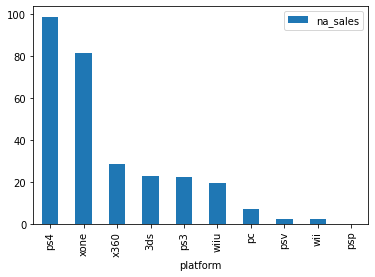

In [ ]:
five_platforms_na.plot(kind='bar')
plt.show()

In [ ]:
five_platforms_eu = period_1.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending = False)
five_platforms_eu = five_platforms_eu.head(10)
five_platforms_eu

,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12
x360,15.49
wiiu,13.15
psv,3.53
wii,2.59


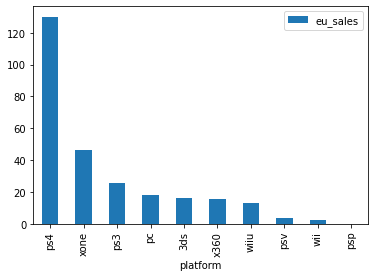

In [ ]:
five_platforms_eu.plot(kind='bar')
plt.show()

In [ ]:
five_platforms_jp = period_1.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending = False)
five_platforms_jp = five_platforms_jp.head(10)
five_platforms_jp

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31
psp,0.36
xone,0.32
x360,0.08
pc,0.00


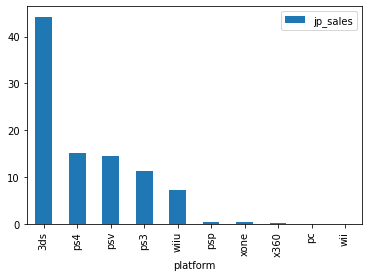

In [ ]:
five_platforms_jp.plot(kind='bar')
plt.show()

**Вывод**

Самые популярные платформы в Северной Америке (топ-5): Xbox 360, PS3, PS4, Xbox One, 3DS.

Самые популярные платформы в Европе (топ-5): PS3, PS4, Xbox 360, 3DS, PC.

Самые популярные платформы в Японии (топ-5): 3DS, PS3, PSP, PS Vita, PS4.


Самые популярные жанры (топ-5)

In [ ]:
five_genre_na = period_1.groupby('genre').agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending = False)
five_genre_na = five_genre_na.head(10)
five_genre_na

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05
fighting,12.43
racing,8.74
platform,6.79
adventure,5.64


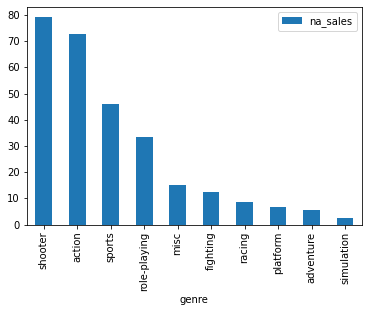

In [ ]:
five_genre_na.plot(kind='bar')
plt.show()

In [ ]:
five_genre_eu = period_1.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending = False)
five_genre_eu = five_genre_eu.head(10)
five_genre_eu

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13
misc,12.86
simulation,7.30
platform,6.80
fighting,6.69


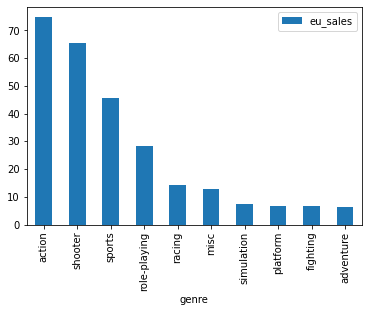

In [ ]:
five_genre_eu.plot(kind='bar')
plt.show()

In [ ]:
five_genre_jp = period_1.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending = False)
five_genre_jp = five_genre_jp.head(10)
five_genre_jp

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87
adventure,3.60
sports,3.26
platform,2.69
simulation,2.31


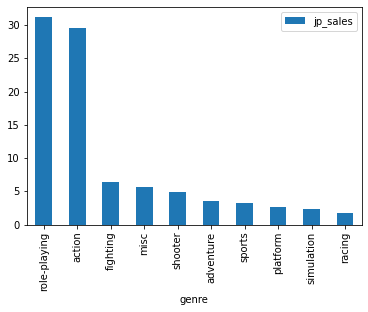

In [ ]:
five_genre_jp.plot(kind='bar')
plt.show()

**Вывод**

Самые популярные жанры в Северной Америке (топ-5): action, shooter, sports, role-playing, misc.

Самые популярные жанры в Европе (топ-5): action, shooter, sports, role-playing, racing.

Самые популярные жанры в Японии (топ-5): role-playing, action, misc, fighting, platform.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе**

In [ ]:
rating_na = period_1.groupby('rating').agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending = False)
rating_na

,na_sales
rating,
m,96.42
norating,64.72
e,50.74
t,38.95
e10+,33.23


<function matplotlib.pyplot.show(close=None, block=None)>

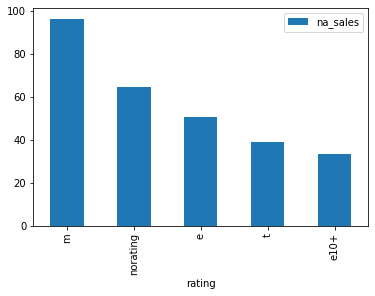

In [ ]:
rating_na.plot(kind='bar')
plt.show

In [ ]:
rating_eu = period_1.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending = False)
rating_eu

,eu_sales
rating,
m,93.44
norating,58.95
e,58.06
t,34.07
e10+,26.16


<function matplotlib.pyplot.show(close=None, block=None)>

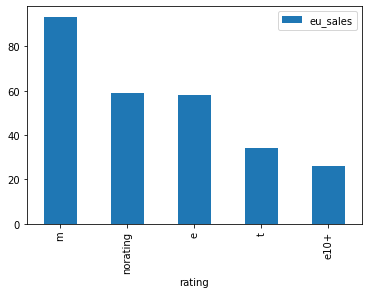

In [ ]:
rating_eu.plot(kind='bar')
plt.show

In [ ]:
rating_jp = period_1.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending = False)
rating_jp

,jp_sales
rating,
norating,56.90
t,14.78
e,8.94
m,8.01
e10+,4.46


<function matplotlib.pyplot.show(close=None, block=None)>

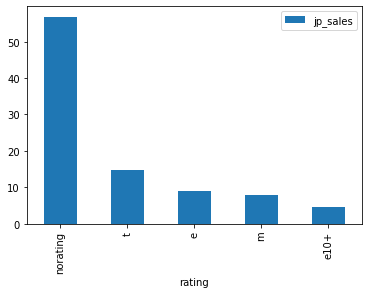

In [ ]:
rating_jp.plot(kind='bar')
plt.show

**Вывод**

Влияние рейтинга ESRB на продажи для Северной Америки и Европы можно заметить. Наибольшее количество продаж приходится на игры с рейтингами категории E (для всех) и M (для "старше 17 лет"). 

В Японии, где действует свое рейтинговое агентство, мы не можем сделать выводы о влиянии рейтинга ESRB, т.к. почти у всех игр в данной выборке нет рейтинга от данной организации.

**Проверка гипотез**

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Н0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 - средние пользовательские рейтинги платформ Xbox One и PC различны.

Для проверки гипотезы о равенстве средних двух генеральных совокупностей по взятым из них выборкам будем использовать функцию st.ttest_ind.

In [ ]:
alpha = 0.05
one_vborka = period_1[period_1['platform']== "xone"]['user_score'].dropna()
two_vborka  = period_1[(period_1['platform'] == 'pc')]['user_score'].dropna() 
tests = st.ttest_ind(one_vborka,two_vborka,equal_var = False)

print('p-значение: ',tests.pvalue)
if tests.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Вывод: средние пользовательсвие рейтинги платформ Xbox One и PC статистически значимо не различаются.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Н0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Н1 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотезы о равенстве средних двух генеральных совокупностей по взятым из них выборкам будем использовать функцию st.ttest_ind.

In [ ]:
alpha = 0.05
one_vborka = period_1[period_1['genre']== "action"]['user_score'].dropna()
two_vborka  = period_1[(period_1['genre'] == 'sports')]['user_score'].dropna() 
tests = st.ttest_ind(one_vborka,two_vborka,equal_var = False)

print('p-значение: ',tests.pvalue)
if tests.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


Вывод: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») статистически значимо различаются.

**Общий вывод**

**Всплеск продаж игр**

Большинство игр было выпущено в период с 2005 по 2010 годы, однако основной всплеск произошел в 1995 году. Поэтому для нас период с 1995 по 2010 годы имеет большое значение, поскольку в этот период было выпущено максимальное количество игр.

<function matplotlib.pyplot.show(close=None, block=None)>

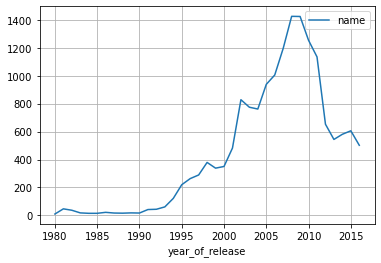

In [ ]:
years_igra.plot(grid = True)
plt.show

**Срок жизни платформ**

Характерный срок 'жизни' платформ 9-10 лет.

<function matplotlib.pyplot.show(close=None, block=None)>

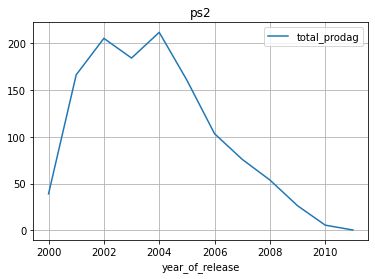

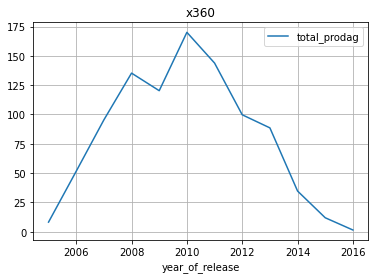

In [ ]:
data[data['platform'] == 'ps2'].pivot_table(index='year_of_release', values='total_prodag', aggfunc='sum').plot(grid = True,title = 'ps2')
data[data['platform'] == 'x360'].pivot_table(index='year_of_release', values='total_prodag', aggfunc='sum').plot(grid = True,title ='x360') 
plt.show

**Лидеры среди продаж**

К 2016 году все представленные платформы имели снижение продаж, однако лишь несколько из них показали сравнительно слабый спад. Это платформы PS4, Xone и 3ds.

**Глобальные продажи игр**

Глобальные продажи игр среди всех платформ характеризуются значительным числом выбросов. Медианные продажи выше у Xbox 360, PS3, PS4 и Xone, а наименьшие - у платформы DC.

**Влияние на продажи платформы с помощью отзывов пользователей и критиков**

Проанализировав данные для топ 10 платформ и обнаружили следующее:

1. PS2: у платформы слабая корреляция как с отзывами критиков, так и пользователей.

2. Xbox 360: у платформы также слабая корреляция как с отзывами критиков, так и пользователей.

3. PS3: корреляция между платформой и отзывами критиков и пользователей также является слабой.

4. Wii: корреляция между платформой и отзывами критиков и пользователей также является слабой.

5. DS: корреляция между платформой и отзывами критиков и пользователей также является слабой.

6. PS: у нас отсутствуют данные для этой платформы в период с 2006 по 2016 год.

7. PS4: корреляция между платформой и отзывами критиков не обнаружена, а корреляция с отзывами пользователей умеренная.

8. GBA: у нас не выявлено корреляции между платформой и отзывами критиков и пользователей.

9. PSP: корреляция между платформой и отзывами критиков является слабой, а корреляция с отзывами пользователей умеренная.

10. 3DS: у этой платформы корреляция между отзывами критиков и пользователей также является слабой, а корреляция между отзывами пользователей и платформой умеренная

**Жанры**

Самым популярным жанром по продажам игр стал shooter, на втором месте platrform. Заметно сильное выделение по продажам именно этих жаров.

**Портер для пользователя региона "Северная Америка"**

Для пользователя региона "Северная Америка" наиболее популярны следующие платформы (топ 5): Xbox 360, PS3, PS4, Xbox One и 3DS.

Наиболее популярными жанрами в этом регионе являются (топ 5): action, shooter, sports, role-playing и miscellaneous.

Также можно наблюдать влияние рейтинга ESRB на продажи. Наибольшее количество продаж приходится на категории M и E (где категория E - для всех, а категория M - для "старше 17 лет").

**Портер для пользователя региона "Европа"**

Для пользователя региона "Европа" можно выделить пять самых популярных платформ: PS3, PS4, Xbox 360, 3DS и PC. 

Среди жанров наиболее популярными являются: action, sports, shooter, racing и misc.

Также стоит отметить, что оценка рейтинга ESRB оказывает влияние на продажи игр в тех же категориях M и E.

**Портер для пользователя региона "Япония"**

Для пользователя из региона "Япония" можно выделить следующую информацию:

Самые популярные платформы (топ 5) - 3DS, PS3, PSP, PSV, PS4.

Самые популярные жанры (топ 5) - ролевые игры, экшн, прочее, файтинги, платформеры.

Нельзя сделать вывод о влиянии рейтинга ESRB на продажи в Японии, т.к. в этом регионе существует своё рейтинговое агенство, и почти все игры из данной выборки не имеют рейтинга от ESRB.

**Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Средние пользовательсвие рейтинги платформ Xbox One и PC статистически значимо не различаются на уровне значимости 5%

**Гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») статистически значимо различаются на уровне значимости 5%